In [13]:
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import display, Math, HTML
from scipy import signal
from matplotlib.animation import FuncAnimation

os.makedirs("./lab3_plots", exist_ok=True)

Ex1

https://www.statlect.com/matrix-algebra/discrete-Fourier-transform

In [14]:
os.makedirs("lab3_plots/ex1", exist_ok=True)

N = 8
frecv_omega = np.exp(-(2*np.pi/N)*1j) # omega pentru componenta F a transf Fourier discrete, exprimata a.i. orice componenta de forma frecv_omega**(m*k) == np.exp(-(2*np.pi/N)*1j*m*k), unde m e indicele liniei si k e indicele coloanei

# LaTex
#\( F_{m,k} = \omega^{(m \cdot k)} = e^{-(\frac{2 \pi}{N}) \cdot 1j \cdot m \cdot k} \quad m,k = 0, 1, \dots, N-1, m_{linie}, k_{coloana}\)
display(Math(r"F_{m,k} = \omega^{(m \cdot k)} = e^{-(\frac{2 \pi}{N}) \cdot 1j \cdot m \cdot k} \quad m,k = 0, 1, \dots, N-1, m_{linie}, k_{coloana}"))

<IPython.core.display.Math object>

In [15]:
print("Matrice Fourier F de 8x8:")
# for m in range(N):
#     for k in range(N):
#         if F[m, k].imag == 0:
#             val_str = f"{F[m, k].real:.2f}"
#         elif F[m, k].imag > 0:
#             val_str = f"{F[m, k].real:.2f} + {F[m, k].imag:.2f}j"
#         else:
#             val_str = f"{F[m, k].real:.2f} - {-F[m, k].imag:.2f}j"
#         display(Math(r"\omega^{(%d \cdot %d)} = %s" % (m, k, val_str)))

F = np.zeros((N, N), dtype=np.complex_)
for m in range(N):
    for k in range(N):
        F[m, k] = frecv_omega**(m*k) 
        
L_linii_omega = []
for m in range(N):
    linie = []
    for k in range(N):
        if F[m, k].imag == 0:
            val_str = f"{F[m, k].real:.2f}"
        elif F[m, k].imag > 0:
            val_str = f"{F[m, k].real:.2f} + {F[m, k].imag:.2f}j"
        else:
            val_str = f"{F[m, k].real:.2f} - {-F[m, k].imag:.2f}j"

        element_str = rf"\omega^{{({m} \cdot {k})}} = {val_str}" # atentie linie, coloana adica m, k, deci nu trebuie sa fac transpusa, asa cum as fi crezut initial din greseala cand parcurgeam coloana-linie in loc de linie-coloana cum e acum corectat       linie.append(element_str)
        linie.append(element_str)
    L_linii_omega.append(linie)

L_linii_latex = []
for linie in L_linii_omega:
    str_linie_latex = " & ".join(linie)
    L_linii_latex.append(str_linie_latex)

str_matrice_latex = r"\begin{bmatrix}" + r" \\ ".join(L_linii_latex) + r"\end{bmatrix}"
display(Math(str_matrice_latex))

Matrice Fourier F de 8x8:


<IPython.core.display.Math object>

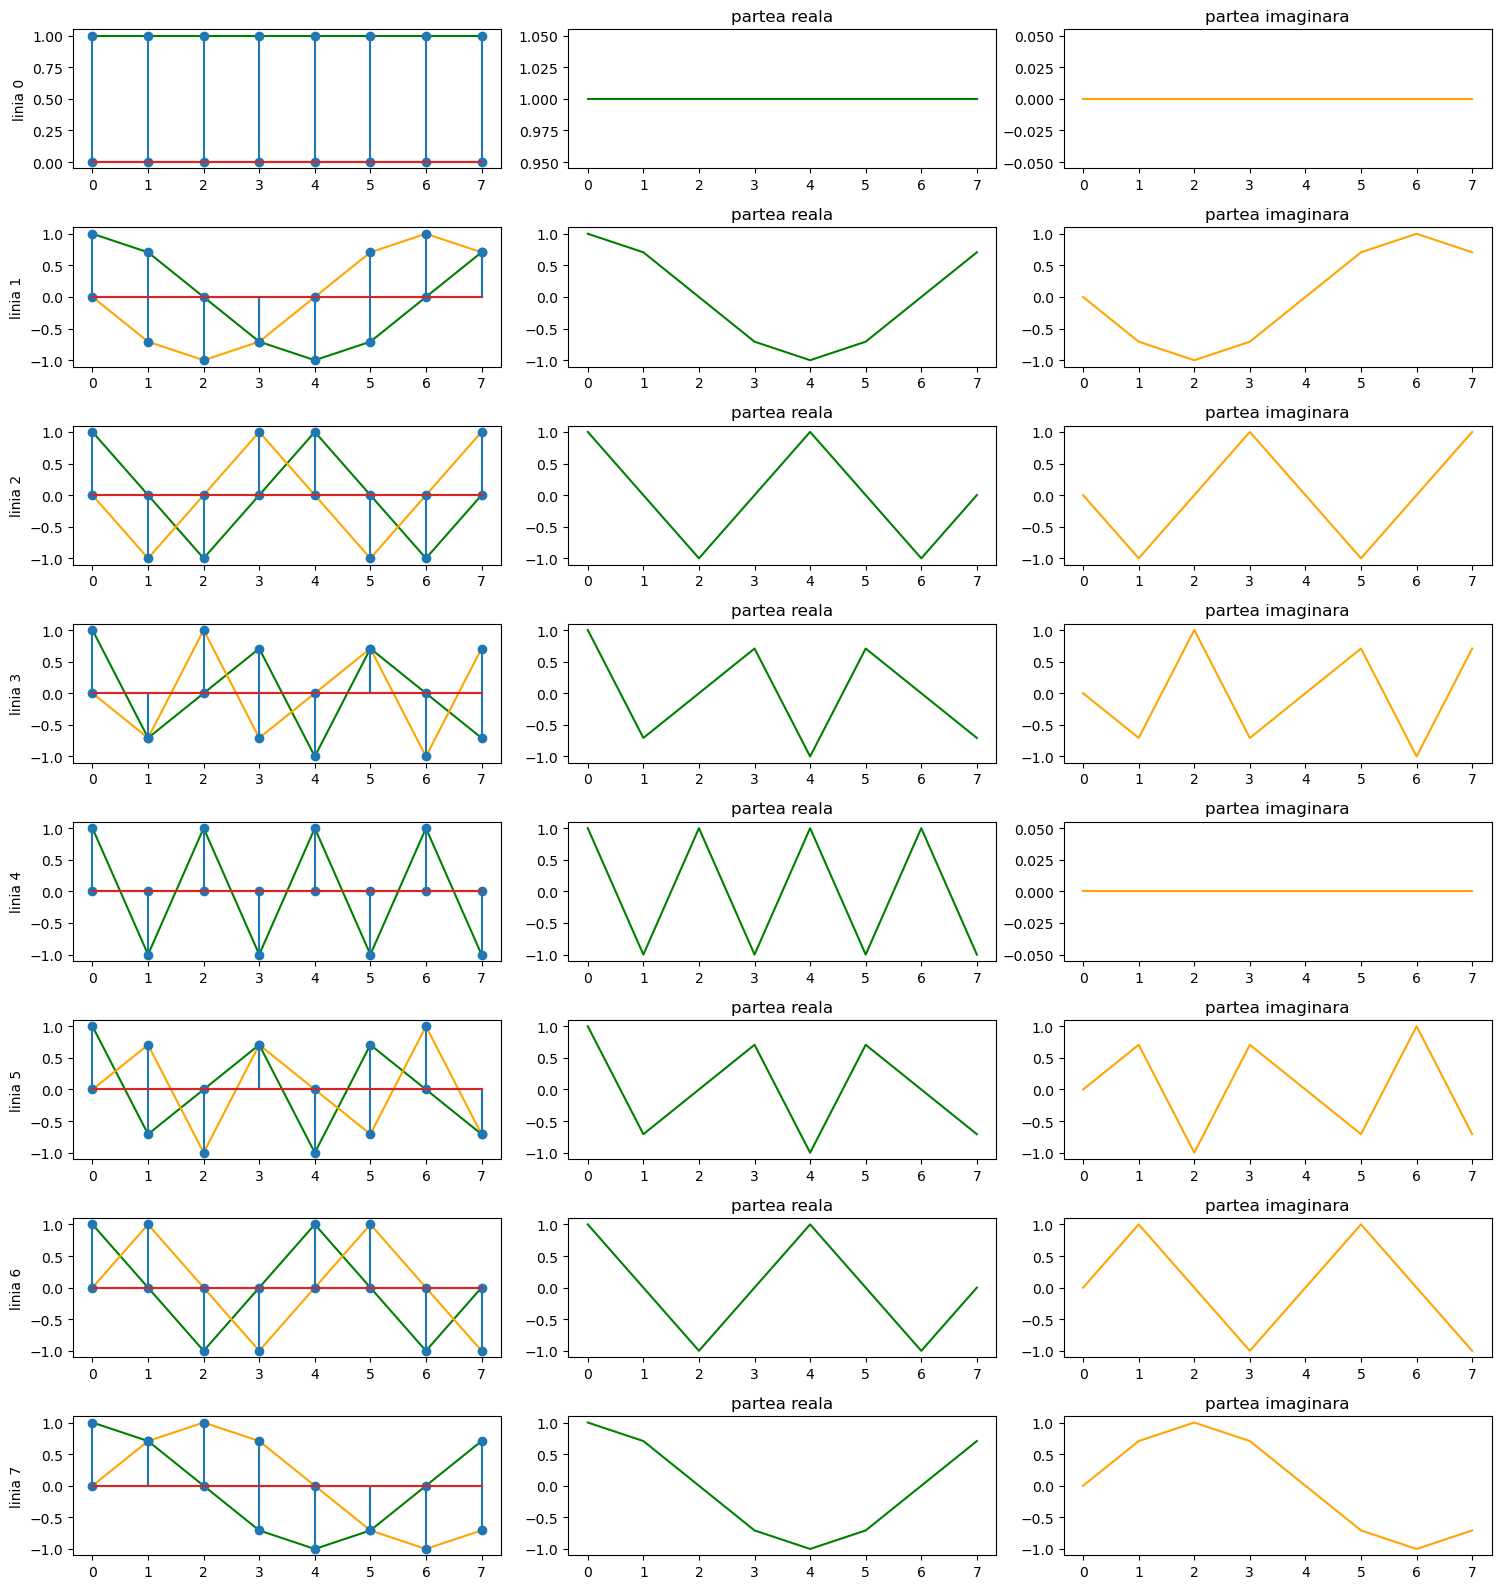

In [16]:
fig, axs = plt.subplots(N, 3, figsize=(15, 16)) # 8 linii, 3 coloane
for i in range(N):
    axs[i, 0].set_ylabel(f"linia {i}")
    axs[i, 0].plot(F[i].real, label='real', color='green')
    axs[i, 0].plot(F[i].imag, label='imaginar', color='orange')
    axs[i, 0].stem(F[i].real)
    axs[i, 0].stem(F[i].imag)
    #axs[i, 0].legend()
    axs[i, 1].plot(F[i].real, color='green')
    axs[i, 1].set_title("partea reala")
    axs[i, 2].plot(F[i].imag, color='orange')
    axs[i, 2].set_title("partea imaginara")

plt.tight_layout()
plt.savefig(fname="./lab3_plots/ex1/Fourier_N=8.pdf", format="pdf")
plt.show()

In [17]:
# complexa si ortogonala, adica F**HF este un multiplu al matricei identitate: F**H * F = N*I
F_H = np.conjugate(F.T)
verif_unitara = np.allclose(F_H @ F, N * np.eye(N)) # np.eye(N) == I de N
print("F unitara:", verif_unitara)

F unitara: True


Ex2

https://erickson.academic.wlu.edu/files/courses2020/sigproc_s2020/readings/DFT_Intro.pdf

In [18]:
# t_n = n*T corespunde complet definitiei teoretice si e un sir discret, echidistant de puncte in timp (in pasi de T), datorita lui n
display(Math(r"t_n = n T = \frac{n}{f_s} \text{,}  \quad n = 0, 1, 2, \ldots, N-1"))
display(Math(r"\omega_0 = \frac{2 \pi}{N T} \text{,} \quad \omega_m = m \omega_0 = m \frac{2 \pi}{N T}"))
display(Math(r"s_m[n] = e^{-j \omega_m t_n} = ... = e^{-j 2 \pi \frac{m n}{N}}")) # exponentiala complexa
display(Math(r"X[m] = \sum_{n=0}^{N-1} x[n] s_m[n] = \sum_{n=0}^{N-1} x[n] e^{-j \frac{2 \pi m n}{N}}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

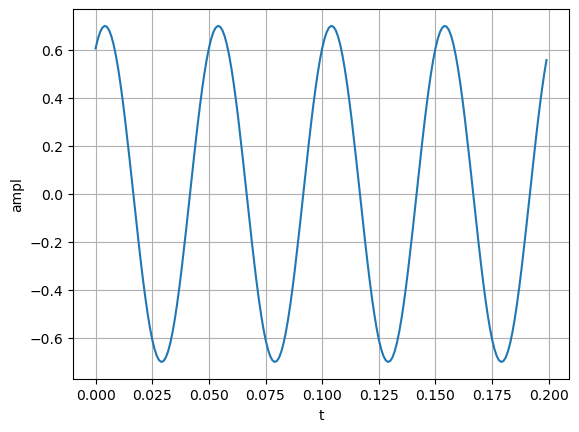

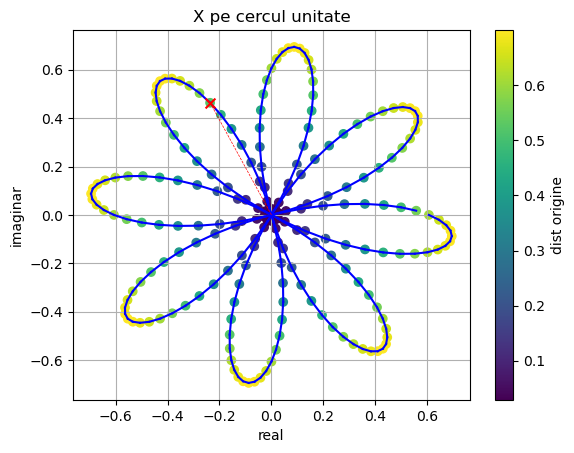

In [19]:
os.makedirs("lab3_plots/ex2", exist_ok=True)

# a) fig 1
# vreau sa folosesc formulele de baza, nu cele echivalente in care nu ma ating de timp discret
# var1 - timpul e discret, iar pentru a ilustra pe cercul unitate punctele consecutive stabilesc o frecv discreta fixata M
frecv = 20
rata_esantionare = 1000
durata = 0.2
T = 1/rata_esantionare # perioada de esantionare
N = durata*rata_esantionare # nr_esantioane din exercitiile din lab2
n = np.arange(0, int(N)) # n = 0, 1, ... N-1

tn = n*T # momentele discrete de timp
x_n = 0.7*np.sin(2*np.pi*frecv*tn+np.pi/3)

plt.plot(tn, x_n)
plt.xlabel("t")
plt.ylabel("ampl")
plt.grid(True)
plt.show()

m = np.arange(0, int(N)) # m = 0, 1, ... N-1
omega0 = (2*np.pi)/(N*T) # frecv de infasurare
omegam = m*omega0
#print(omega0, omegam, sep="\n")
M = 1 # frecv discreta fixata pentru a conecta puncte discrete consecutive intre ele din cauza faptului ca X_discret are dimensiunea NxN
sm_n = np.exp(-1j*omegam[M]*tn)

# ceva f f important, practic in laborator scrie o formula foarte simpla in care nici nu e specificat omega tocmai pt ca omegam[1] == omega0

#print(sm_n)
X_discret = x_n*sm_n

# plt.scatter(X_discret.real, X_discret.imag, color='black', marker='x', s=50)
fig, ax = plt.subplots()
for k in range(len(X_discret)-1): # conecteaza punctele prin segmente pe planul complex
    ax.plot([X_discret.real[k], X_discret.real[k+1]], [X_discret.imag[k], X_discret.imag[k+1]], color='blue')
ax.scatter(X_discret.real, X_discret.imag, c=np.abs(X_discret), cmap='viridis')
ax.set_xlabel("real")
ax.set_ylabel("imaginar")
ax.grid(True)
ax.set_title("X pe cercul unitate")

k = 35 # indexul esantionului de marcat
xk = X_discret.real[k]
yk = X_discret.imag[k]
ax.scatter([xk], [yk], color='red', marker='x', s=50, zorder=2) # zorder pt suprapunere
ax.plot([0, xk], [0, yk], color='red', linestyle='--', linewidth=0.5)

plt.colorbar(ax.collections[0], label='dist origine')
plt.savefig(fname="./lab3_plots/ex2/X_pe_cercul_unitate.pdf", format="pdf")
plt.show()

# pt animatii, ele sunt numai in fisierul python, nu merg in jupyternotebook
# plt.ion()
# fig, ax = plt.subplots()

# for i in range(1, len(X_discret)):
#     ax.set_xlim(X_discret.real.min() * 1.1, X_discret.real.max() * 1.1)
#     ax.set_ylim(X_discret.imag.min() * 1.1, X_discret.imag.max() * 1.1)
#     ax.set_xlabel("real")
#     ax.set_ylabel("imaginar")
#     ax.grid(True)
#     ax.set_title("X pe cercul unitate")
#     ax.scatter(X_discret.real[i], X_discret.imag[i], c=np.abs(X_discret[i]))
#     plt.draw()
#     plt.pause(0.05)
# plt.ioff()
# plt.show()


Text(0.5, 1.0, 'X pe cercul unitate')

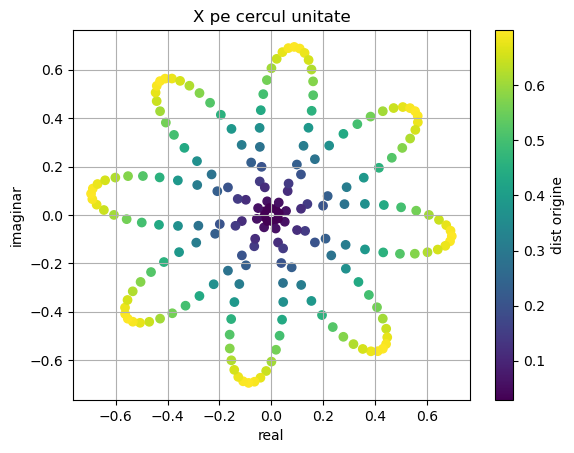

In [20]:
# a) fig 1
# var2 - vreau doar sa aplic formula aceea simpla din laborator ca sa verific ca de fapt X_discret = x_n*sm_n pt omega0 e acelasi lucru cu X = x_n*np.exp(-2j*np.pi*n/N)
X = x_n*np.exp(-2j*np.pi*n/N)
plt.scatter(X.real, X.imag, c = np.abs(X))
plt.xlabel("real")
plt.ylabel("imaginar")
plt.grid(True)
plt.colorbar(label='dist origine')
plt.title("X pe cercul unitate")

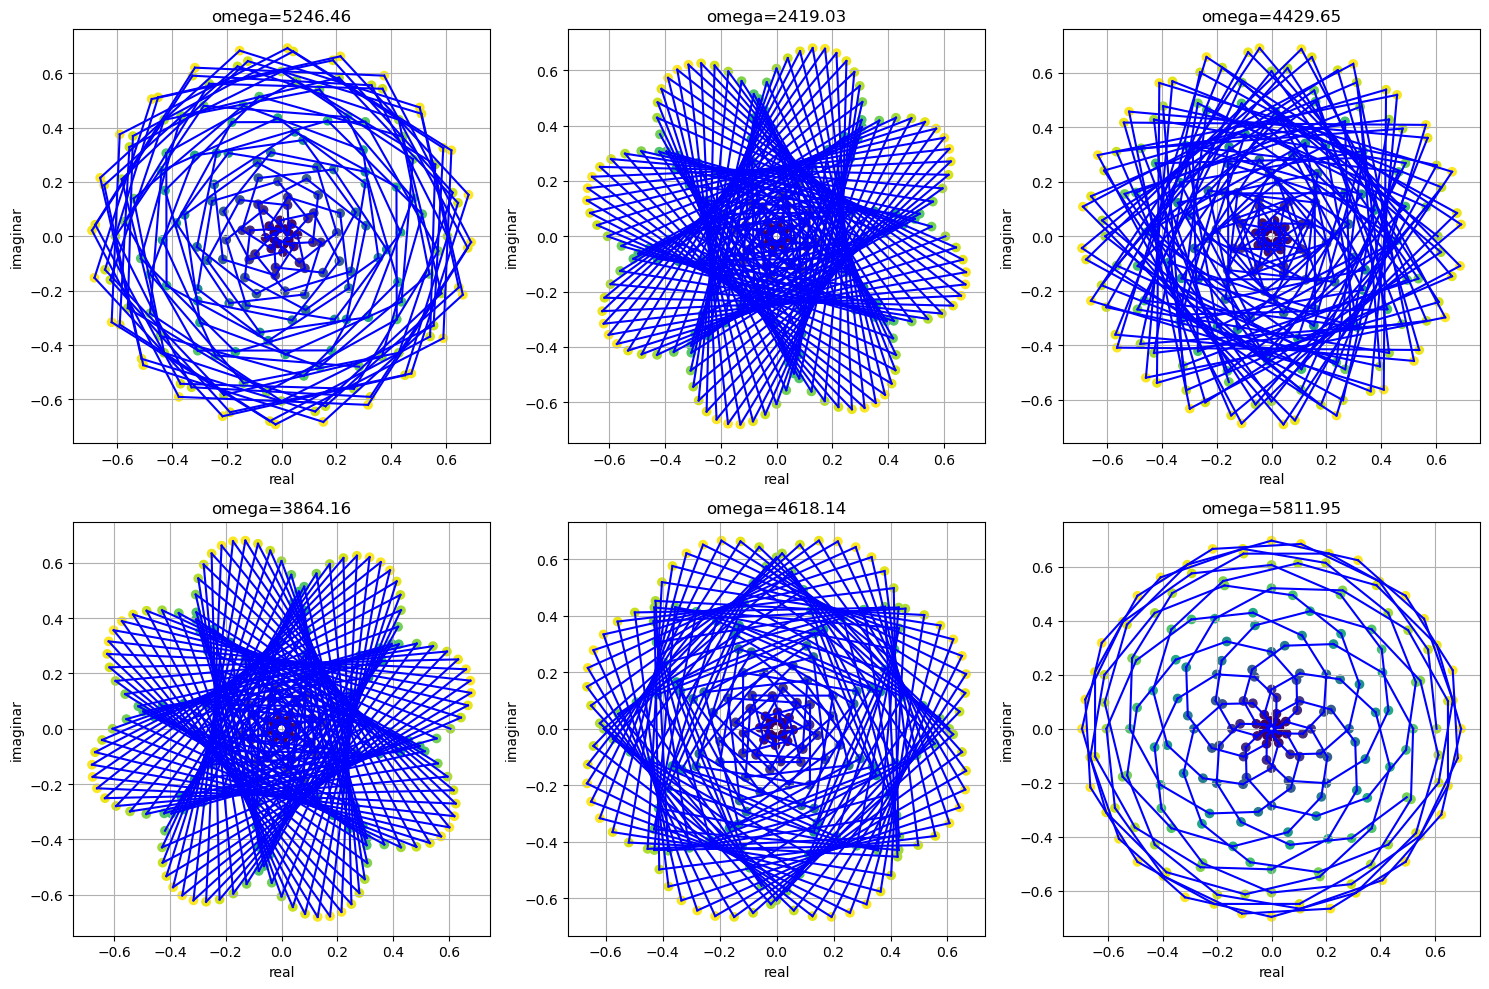

In [21]:
# b)
fig, axes = plt.subplots(2, 3, figsize=(15, 10)) # 2 linii, 3 coloane
selectie_omegam = np.random.choice(omegam, size=6, replace=False)
axes = axes.flatten()
for i, omega in enumerate(selectie_omegam):
    sm_n = np.exp(-1j*omega*tn)
    X_discret = x_n*sm_n

    ax = axes[i]
    for k in range(len(X_discret)-1): # conecteaza punctele prin segmente pe planul complex
        ax.plot([X_discret.real[k], X_discret.real[k+1]], [X_discret.imag[k], X_discret.imag[k+1]], color='blue')
    ax.scatter(X_discret.real, X_discret.imag, c=np.abs(X_discret), cmap='viridis')
    ax.set_xlabel("real")
    ax.set_ylabel("imaginar")
    ax.set_title(f"omega={omega:.2f}")
    ax.grid(True)

plt.tight_layout()
plt.savefig(fname="./lab3_plots/ex2/X_pe_cercul_unitate_omega_variabil.pdf", format="pdf")
plt.show()
    

In [22]:
# pt animatii, ele sunt numai in fisierul python, nu merg in jupyternotebook
# fig, axes = plt.subplots(2, 3, figsize=(15, 10))
# axes = axes.flatten()
# X_selectie_omegam = []
# for omega in selectie_omegam:
#     sm_n = np.exp(-1j*omega*tn)
#     X_selectie_omegam.append(x_n*sm_n)

# plt.ion()

# for i in range(len(X_selectie_omegam[0])):
#     for ax_index, ax in enumerate(axes):
#         X_discret = X_selectie_omegam[ax_index]

#         ax.set_xlim(X_discret.real.min() * 1.1, X_discret.real.max() * 1.1)
#         ax.set_ylim(X_discret.imag.min() * 1.1, X_discret.imag.max() * 1.1)
#         ax.set_xlabel("real")
#         ax.set_ylabel("imaginar")
#         ax.grid(True)
#         ax.set_title(f"omega={selectie_omegam[ax_index]:.2f}")
#         if i > 0:
#             ax.plot(X_discret.real[:i+1], X_discret.imag[:i+1], color='blue')
#         ax.scatter(X_discret.real[:i+1], X_discret.imag[:i+1], c=np.abs(X_discret[:i+1]), cmap='viridis')

#     plt.draw()
#     plt.pause(0.05)

# plt.ioff()
# plt.show()

Ex3

<IPython.core.display.Math object>

x = 1*sin(2*pi*5*t)+0.75*sin(2*pi*23*t)+0.15*sin(2*pi*60*t)


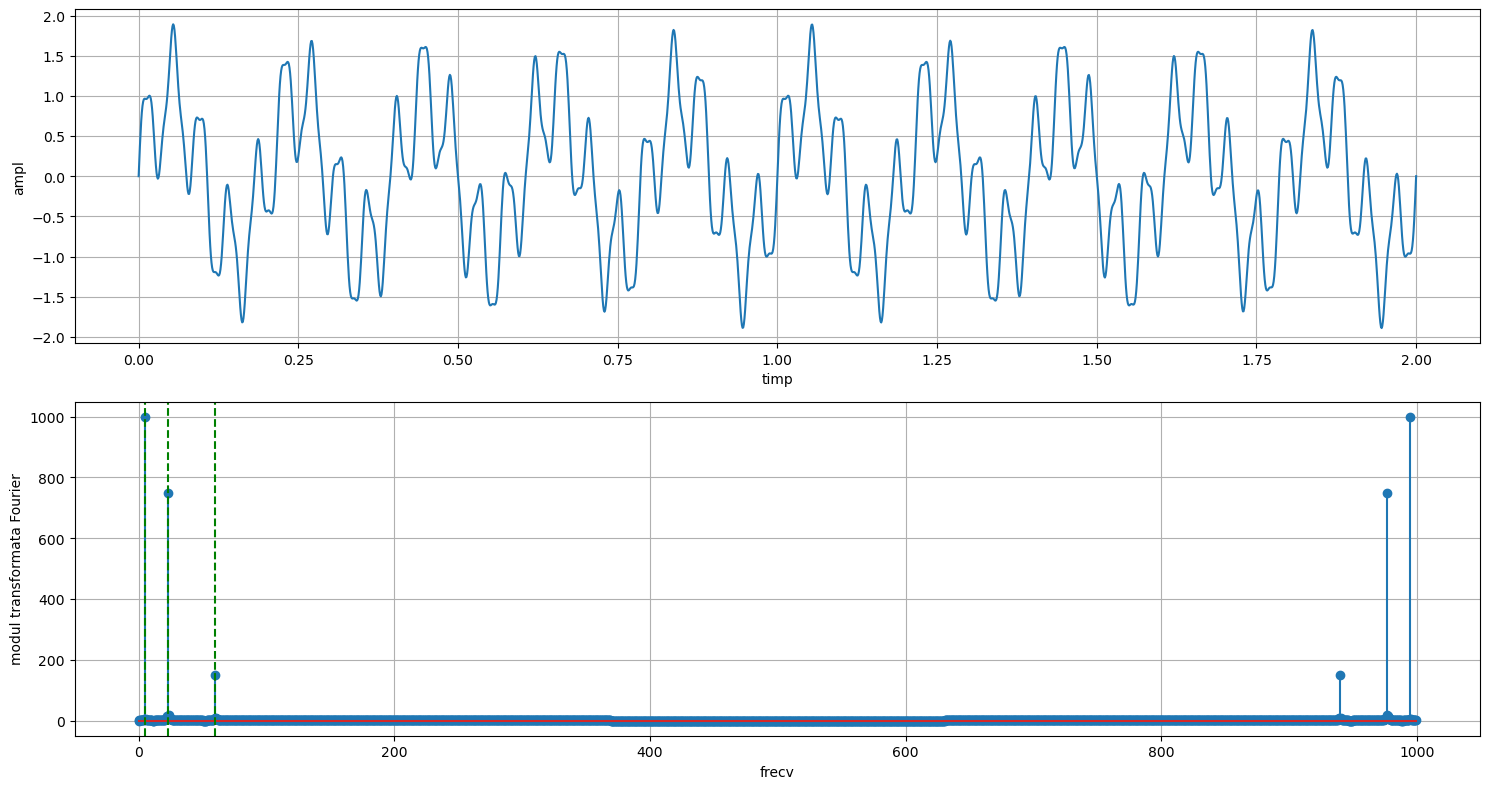

In [23]:
os.makedirs("lab3_plots/ex3", exist_ok=True)

display(Math(r"X(\omega) = \sum_{n=0}^{N-1} x[n] e^{-2\pi j n \omega / N}"))

rata_esantionare = 1000
durata = 2
T = 1/rata_esantionare
N = durata*rata_esantionare
t = np.linspace(0, durata, int(N))
n = np.arange(N)

L_sinusoide = []
L_frecv = [5, 23, 60]
L_ampl = [1, 0.75, 0.15]
k = 0
for frecv, ampl in zip(L_frecv, L_ampl):
    L_sinusoide.append(ampl*np.sin(2*np.pi*frecv*t))
    if k == 0:
        print("x =", end=" ")
    if k != len(L_frecv)-1:
        print(f"{ampl}*sin(2*pi*{frecv}*t)", end="+")
    else:
        print(f"{ampl}*sin(2*pi*{frecv}*t)")
    k+=1

x = sum(L_sinusoide)

frecvente = np.arange(0, int(N), 1)
L_coef_fourier = []
for frecv in frecvente:
    for i, omega in enumerate(omegam):
        exp_complexa = np.exp(-2j*np.pi*frecv*n/N)
        coef_fourier = np.sum(x*exp_complexa)
    L_coef_fourier.append(coef_fourier)

modul_fourier = np.abs(L_coef_fourier)
frecvente_Hz = frecvente*rata_esantionare/N

fig, axs = plt.subplots(2, figsize=(15, 8))
axs[0].plot(t, x)
axs[0].set_xlabel("timp")
axs[0].set_ylabel("ampl")
axs[0].grid(True)
axs[1].stem(frecvente_Hz, modul_fourier)
axs[1].set_xlabel("frecv")
axs[1].set_ylabel("modul transformata Fourier")
axs[1].grid(True)
for frecv, ampl in zip(L_frecv, L_ampl):
    axs[1].axvline(x=frecv, color='green', linestyle='--')
plt.tight_layout()
plt.savefig(fname="./lab3_plots/ex3/modul_transf_Fourier.pdf", format="pdf")
plt.show()